Ce îi poate face pe oameni fericiți? Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc.

Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:

- doar de Produsul intern brut
- de Produsul intern brut si de gradul de libertate.


Specificaţi, proiectaţi, implementaţi si testati cate un algoritm de regresie pentru prima problema bazat pe:

- metoda gradientului descrescator stocastic (demo) - please check the notebook
- metoda gradientului descrescator bazat pe batch-uri, cu tool/API si/sau cod propriu (tema).

Doar de Produsul intern brut

In [36]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import mean_squared_error
from BGD import MyBGDRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [37]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

In [3]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

In [4]:
# put all steps togheter

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()



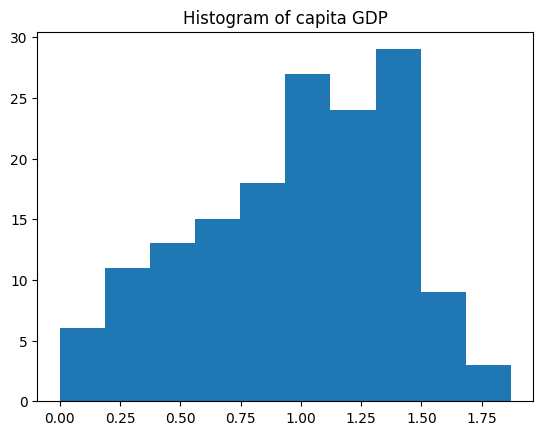

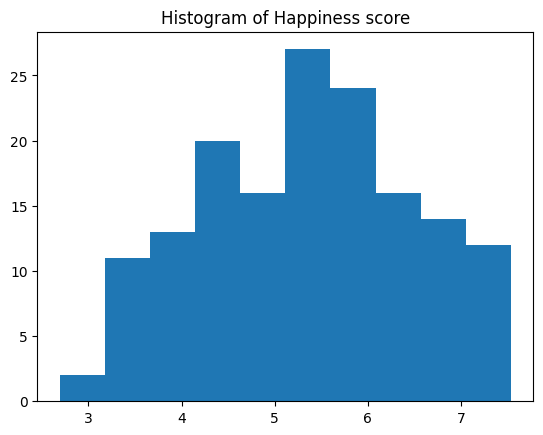

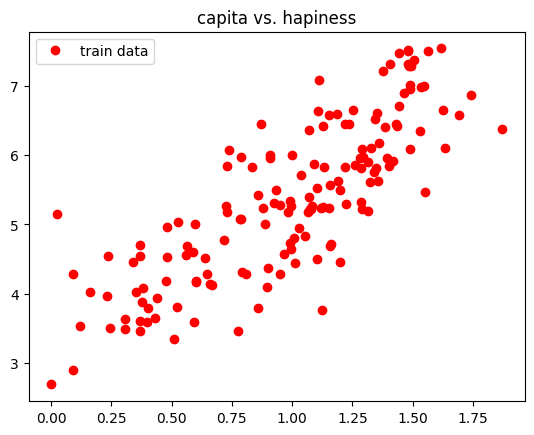

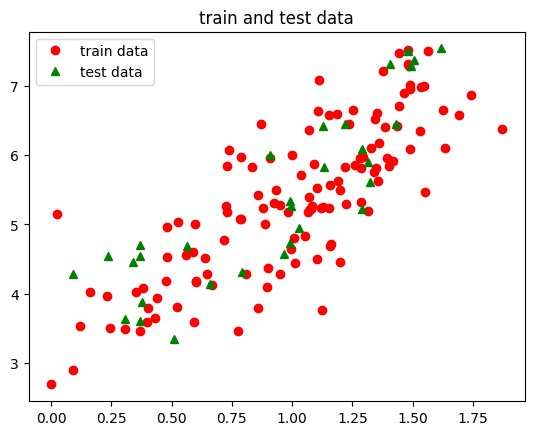

the learnt model: f(x) =  3.1307926021567205  +  2.2469018868740553  * x


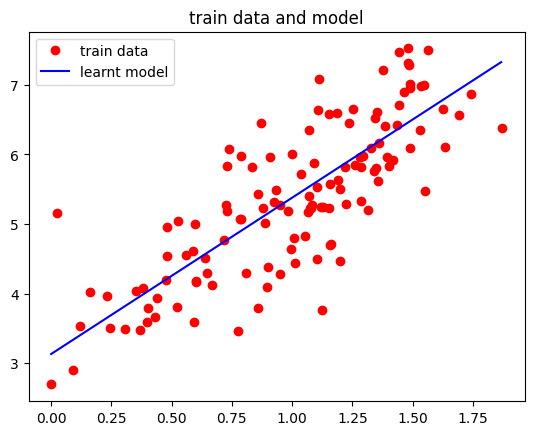

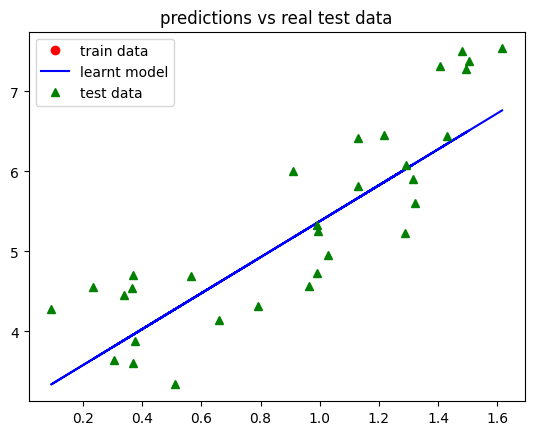

prediction error (manual):  0.40170722541487563
prediction error (tool):  0.40170722541487563


In [16]:
def univariateRegression_tool():

    crtDir =  os.getcwd()
    filePath = os.path.join(crtDir, 'data', '2017.csv')

    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotDataHistogram(inputs, 'capita GDP')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    plotData(trainInputs, trainOutputs, [], [], testInputs, testOutputs, "train and test data")

    # training step
    xx = [[el] for el in trainInputs]

    # using sklearn
    from sklearn import linear_model
    # model initialisation
    regressor = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
    # training the model by using the training inputs and known training outputs
    regressor.fit(xx, trainOutputs)
    # save the model parameters
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

    # plot the model
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

    #makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    #makes predictions for test data (by tool)
    computedTestOutputs = regressor.predict([[x] for x in testInputs])
    plotData([], [], testInputs, computedTestOutputs, testInputs, testOutputs, "predictions vs real test data")

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print("prediction error (tool): ", error)

univariateRegression_tool()

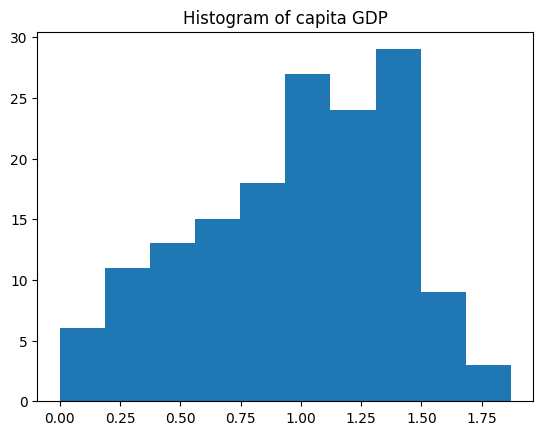

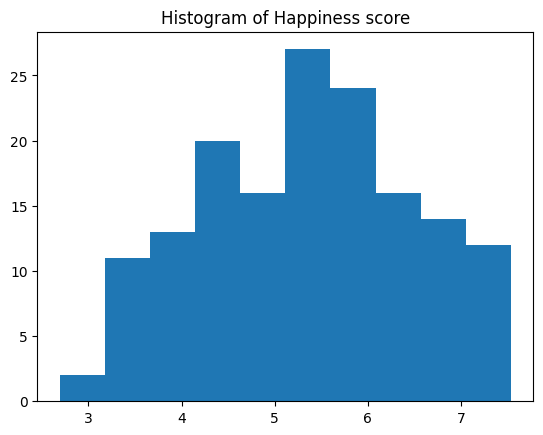

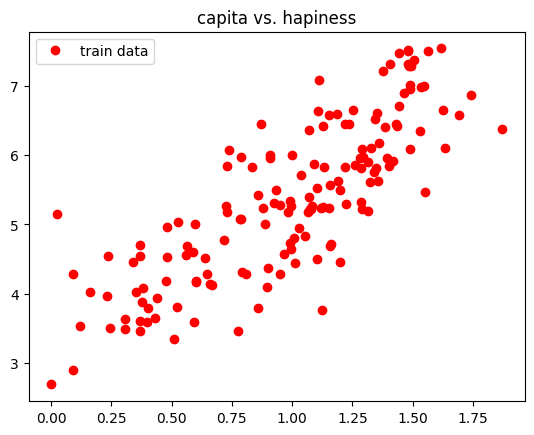

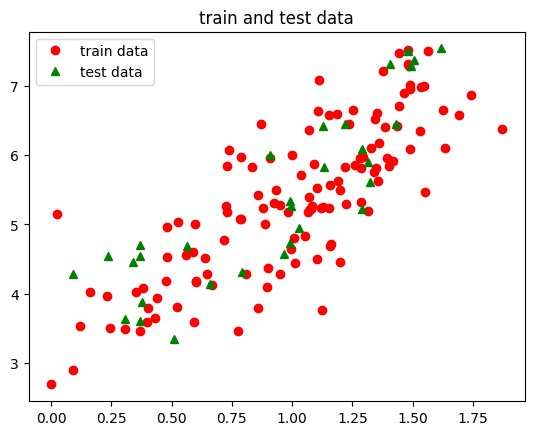

the learnt model: f(x) =  2.9036523169373787  +  2.4231979428824726  * x


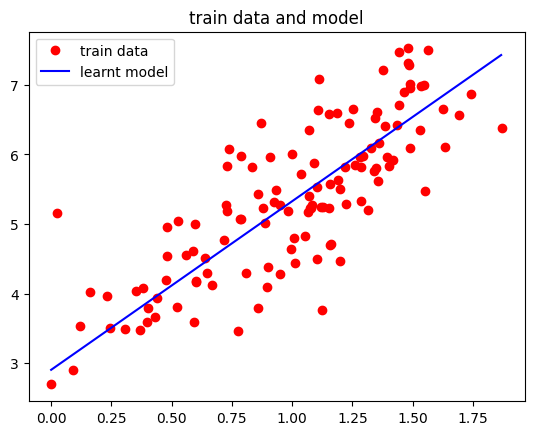

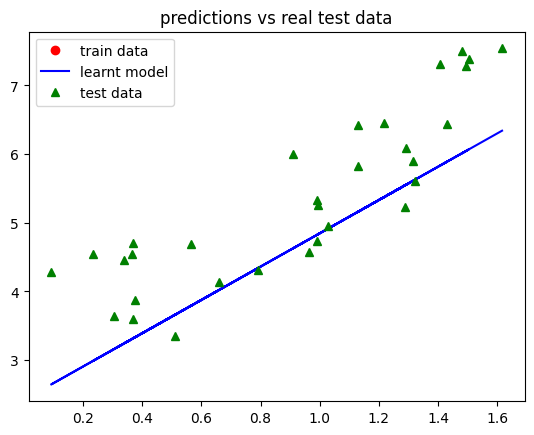

prediction error (manual):  0.8725334072327244
prediction error (tool):  0.8725334072327245


In [11]:
def univariateRegression_me():

    crtDir =  os.getcwd()
    filePath = os.path.join(crtDir, 'data', '2017.csv')

    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotDataHistogram(inputs, 'capita GDP')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    plotData(trainInputs, trainOutputs, [], [], testInputs, testOutputs, "train and test data")

    # training step
    xx = [[el] for el in trainInputs]

    # using developed code
    # regressor = linear_model.SGDRegressor(max_iter =  10000)
    regressor = MyBGDRegression()
    regressor.fit(xx, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

    # plot the model
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

    #makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    #makes predictions for test data (by tool)
    computedTestOutputs = regressor.predict([[x] for x in testInputs])
    plotData([], [], testInputs, computedTestOutputs, testInputs, testOutputs, "predictions vs real test data")

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print("prediction error (tool): ", error)

univariateRegression_me()

De Produsul intern brut si de gradul de libertate.

In [38]:
def plot3Ddata(x1Train, x2Train, yTrain,
               x1Model=None, x2Model=None, yModel=None,
               x1Test=None, x2Test=None, yTest=None,
               title=None):
    from mpl_toolkits import mplot3d
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Plot TRAIN
    ax.scatter(x1Train, x2Train, yTrain, c='red', marker='o', label='train data')

    # Plot TEST, dacă e prezent
    if x1Test is not None and len(x1Test) > 0:
        ax.scatter(x1Test, x2Test, yTest, c='green', marker='^', label='test data')

    # Plot MODEL, dacă e prezent
    if x1Model is not None and len(x1Model) > 0:
        ax.scatter(x1Model, x2Model, yModel, c='blue', marker='*', label='learnt model')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()


In [39]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

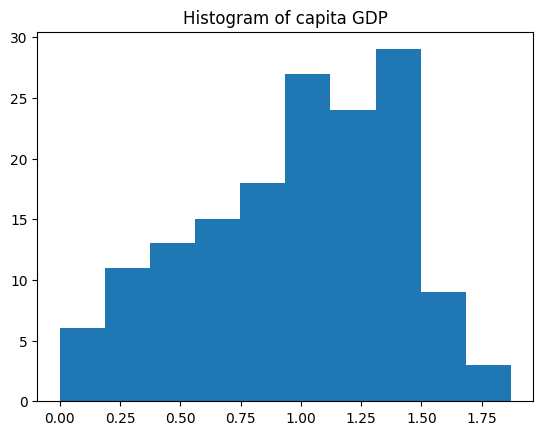

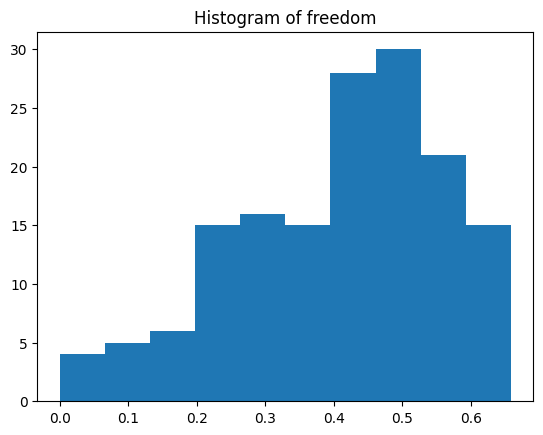

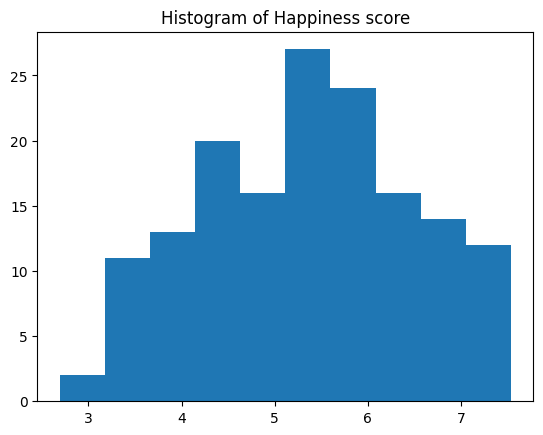

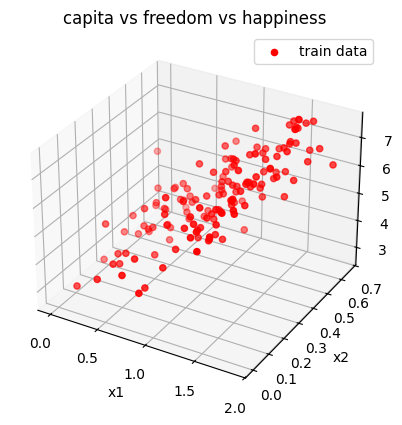

In [40]:
# problem hapiness = w0 + w1 * GDPcapita + w2 * freedom
# load data
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', '2017.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

In [41]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

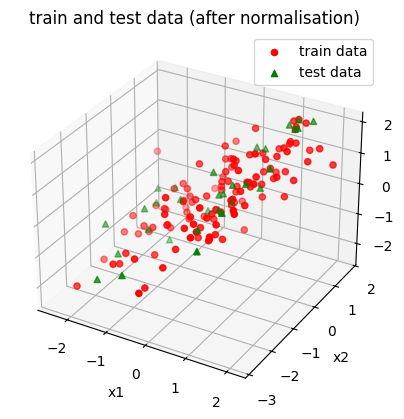

In [42]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(
    feature1train, feature2train, trainOutputs,
    None, None, None,  # <- în loc de [] pe model
    feature1test, feature2test, testOutputs,
    "train and test data (after normalisation)"
)

the learnt model: f(x) =  [-0.00983533]  +  0.6961212676953895  * x1 +  0.30530441270736147  * x2


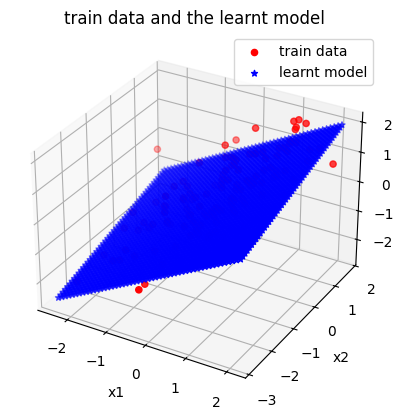

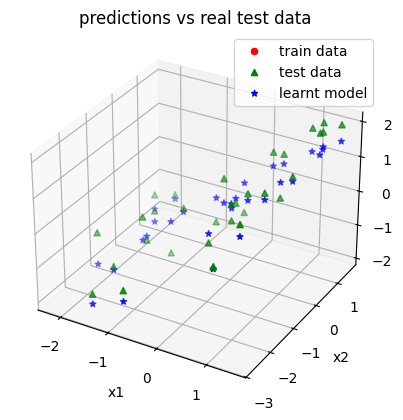

prediction error (manual):  0.2311667588099395
prediction error (tool):    0.2311667588099395


In [49]:
def bivariatRegression_tool():
    from sklearn import linear_model
    import numpy as np

    # Train the regressor
    regressor = linear_model.SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000)
    regressor.fit(trainInputs, trainOutputs)

    # Extract model coefficients
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

    # Create a grid for the model surface
    noOfPoints = 50
    x1_ref = np.linspace(min(feature1train), max(feature1train), noOfPoints)
    x2_ref = np.linspace(min(feature2train), max(feature2train), noOfPoints)
    x1_mesh, x2_mesh = np.meshgrid(x1_ref, x2_ref)

    # Compute predictions for the grid
    y_ref = w0 + w1 * x1_mesh.ravel() + w2 * x2_mesh.ravel()

    # Plot train data and the learnt model
    plot3Ddata(
        feature1train, feature2train, trainOutputs,
        x1_mesh.ravel(), x2_mesh.ravel(), y_ref,
        [], [], [],
        'train data and the learnt model'
    )

    # Predict test data
    computedTestOutputs = regressor.predict(testInputs)

    # Plot predictions vs real test data
    plot3Ddata(
        [], [], [],
        feature1test, feature2test, computedTestOutputs,
        feature1test, feature2test, testOutputs,
        'predictions vs real test data'
    )

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print('prediction error (manual): ', error)

    from sklearn.metrics import mean_squared_error

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print('prediction error (tool):   ', error)

bivariatRegression_tool()

the learnt model: f(x) =  6.209414702848078e-17  +  0.697654053436829  * x1 +  0.30488115253848397  * x2


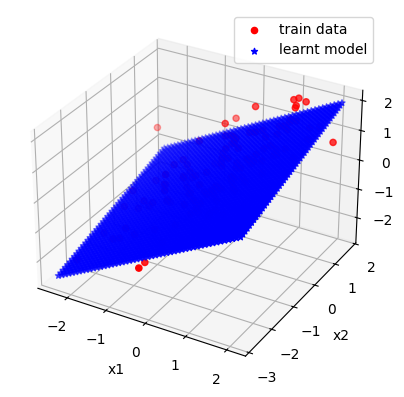

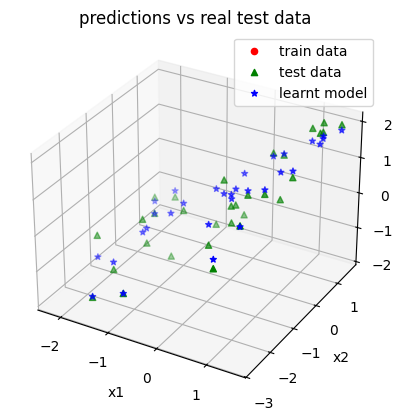

prediction error (manual):  0.23350082305377143
prediction error (tool):    0.23350082305377143


In [51]:
# identify (by training) the regressor

def bivariatRegression_me():

    # identify (by training) the regressor

    # using developed code
    from BGD import MyBGDRegression
    # model initialisation
    regressor = MyBGDRegression()

    regressor.fit(trainInputs, trainOutputs)
    # print(regressor.coef_)
    # print(regressor.intercept_)

    #parameters of the liniar regressor
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )

    #numerical representation of the regressor model

    noOfPoints = 50
    xref1 = np.linspace(min(feature1train), max(feature1train), noOfPoints)
    xref2 = np.linspace(min(feature2train), max(feature2train), noOfPoints)
    x1_mesh, x2_mesh = np.meshgrid(xref1, xref2)
    yref = w0 + w1 * x1_mesh.ravel() + w2 * x2_mesh.ravel()

    # Plot train data and model
    plot3Ddata(
        feature1train, feature2train, trainOutputs,
        x1_mesh.ravel(), x2_mesh.ravel(), yref,
        [], [], [],
    )
    # use the trained model to predict new inputs

    # makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el[0] + w2 * el[1] for el in testInputs]
    # makes predictions for test data (by tool)
    computedTestOutputs = regressor.predict(testInputs)

    plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')


    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print('prediction error (manual): ', error)

    from sklearn.metrics import mean_squared_error

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print('prediction error (tool):   ', error)

bivariatRegression_me()

